![Daniel Mwaka Phase 1 Project](Images/DEHAVILLAND_DHC-8-311.png)

# Data-Driven Decision Support for Aircraft Procument


<strong>Student:</strong> Daniel Mwaka

<strong> Student Pace:</strong> DSF-FT12-Hybrid

<strong> Instructor:</strong> Samuel Karu    


## Overview
This project aims to support the company's data-driven decision to procure relatively low-risk airplane models to operate the fleet in the commercial and private enterprise sectors. It analyzes a dataset compiled by the National Transportation Safety board and retrieved from Kaggle.com. Presented recommendations are deduced from descriptive statistics results and backed-up by interactive visualizations modeled using Tableau Public. 

## Business Problem
Venturing into a new industry avails a company of potential growth opportunities. Diversifying a company's portfolio lowers reliance on a single revenue stream (asset diversification) and optimizes resilience against unfavorable business environments/ factors (Luo, 2022). However, venturing into a highly sensitive sector, such as operating airplanes for commercial and private enterprises, necessitates data-driven decisions, strategic implementation, and formative performance evaluation (Altundag & Wynn, 2024). Purchasing airplane models prone to crashing poses a substantial risk to human life, brand image, competitiveness, profitability, and the company's longevity once it ventures into the new industry.  



## Data Understanding
The NTSB aviation accident database contains information on crashes and contingency incidents within the U.S., its territories, and across international waters from 1962 to 2023. The dataset was retrieved from Kaggle.com (NTSB, 2023). The dataset is formatted as a .csv file with 31 columns and 88889 rows. The columns are meticulously organized to capture variables of interest in aircraft accidents and incidents. Extracting, analyzing, and visualizing relevant data from the dataset is vital to shedding insight into the safest, low-risk airplane models for a new entrant to the commercial aviation industry.

However, the dataset is enormous, contains some missing values duplicates, and needs to be customized to meet new entrants' needs aiming to purchase and operate airplanes for commercial and private enterprises. For instance, it contains data for airplane crashes across multiple scenarios (purpose of the flight), in which some cases exceed the target scope of the company. For this project, the target variables are categorized into Dimensions and Measures. The Dimension variables include: Event Date, Investigation Type, Aircraft Damage, Location, Make, Model, Weather Condition, and Purpose of Flight. The Measure variables include: The number of Engines, Total Fatal Injuries, Total Minor Injuries, and Total Uninjured passengers. The insights yielded from analyzing these variables and visualizing their respective relationships are deemed appropriate for deducing recommendations to support data-driven decisions by the company to procure a fleet that comprises safe, low-risk airplanes   


In [1]:
# Importing standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Loading the dataset and creating the master dataframe
df_master = pd.read_csv("Data/AviationData.csv", encoding='latin1', low_memory=False)
df_master.shape
print(f"This data set consists of {df_master.shape[0]} rows")
print(f"This data set consists of {df_master.shape[1]} columns")

This data set consists of 88889 rows
This data set consists of 31 columns


Copying the initialy loaded DataFrame to perfom ETL processes without 
modifying df_master. 

In [3]:
df=df_master.copy()
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 88889 rows
This data set consists of 31 columns


In [4]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

It is evident that the columns from 4th index to the 30th index are
missing some data values. 

In [6]:
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

The data type for all the variables is either an object
or a float. This information reveals the need for data type 
transformations (to be perfomed later). 

In [7]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

## Data Preparation
Digital maturity in leveraging novel data analytics is the key driver for aircraft safety. Manufacturers use these technologies to design safer aircraft (Boyd & Stolzer, 2016). On the other hand, companies operating in the airline sector base their strategic procurement plans on data-supported decisions (Altundag & Wynn, 2024). The progressive scope in which key stakeholders in the airline sector are embracing data analytics is reflected in the cumulative number of aircraft accidents and accidents recorded by the NTSB for each decade. Additionally, structural and material design advancements progressively increase aircraft safety.
Thus, the first step to cleaning the data is to convert the `Event.Date` format from an object to the datetime format and slice the DataFrame to capture data for accidents and incidents from 2000 to 2023. 

In [8]:
# Converting the 'Event.Date' column to a datetime dtype
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
# Incoporating conditionals to select the period between 2000 and 2023
mask_2000_2023 = (df['Event.Date'].dt.year >= 2000) & (df['Event.Date'].dt.year <= 2023)
# Applying the masks
df = df[mask_2000_2023]

As captured in the time-series plot below, the number of aircraft accidents and incidents has been dropping. The selected period is deemed appropriate because analyzing data for aircraft accidents and incidents before 2000 would comprise the reliability of deduced recommendations for real-world application in the 2020s.

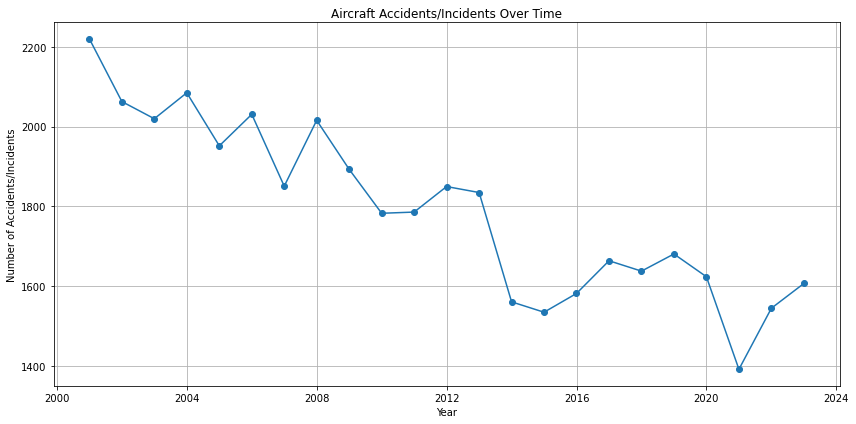

In [9]:
# Setting the 'Event.Date' as the index
df.set_index('Event.Date', inplace=True)

# Resampling the data to count incidents per year (year-end)
yearly_counts = df.resample('Y').size()  

# Creating the time series line plot
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', linestyle='-')

plt.title('Aircraft Accidents/Incidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents/Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

The second step is dropping all the columns deemed inappropriate for this project

In [10]:
# Dropping columns with data deemed inappropriate per the project's objectives
columns_to_drop = ['Event.Id', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'Registration.Number', 'FAR.Description', 'Schedule', 'Air.carrier', 'Publication.Date', 'Injury.Severity', 'Report.Status', 'Broad.phase.of.flight', 'Amateur.Built','Accident.Number']
df.drop(columns = columns_to_drop, inplace=True)

In [11]:
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 41214 rows
This data set consists of 14 columns


In [12]:
df.dtypes

Investigation.Type         object
Location                   object
Country                    object
Aircraft.damage            object
Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
dtype: object

Droping rows for entries with NaNs except for the float data type columns. The missing values for `Number.of.Engines` are also dropped because the number of engines in an aircraft despite being an interger represent an object and the variable is discrete. 

In [13]:
df = df.dropna(subset=['Location'])
df = df.dropna(subset=['Aircraft.damage'])
df = df.dropna(subset=['Make'])
df = df.dropna(subset=['Model'])
df = df.dropna(subset=['Number.of.Engines'])
df = df.dropna(subset=['Engine.Type'])
df = df.dropna(subset=['Purpose.of.flight'])
df = df.dropna(subset=['Weather.Condition'])

In [14]:
df.isna().sum()

Investigation.Type            0
Location                      0
Country                       8
Aircraft.damage               0
Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries       9213
Total.Serious.Injuries    10005
Total.Minor.Injuries       9283
Total.Uninjured            4517
Weather.Condition             0
dtype: int64

The descriptive statistics for the float data type columns (except Number.of.Engines) are computed to determine the best approach to impute missing values.

In [15]:
# Computing the descriptive statistics for float dtype columns 
columns_to_check = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

for col in columns_to_check:
    print(f"Descriptive Statistics for {col}:")
    print(df[col].describe())

Descriptive Statistics for Total.Fatal.Injuries:
count    20912.000000
mean         0.447972
std          1.111269
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         88.000000
Name: Total.Fatal.Injuries, dtype: float64
Descriptive Statistics for Total.Serious.Injuries:
count    20120.000000
mean         0.320974
std          0.668653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          9.000000
Name: Total.Serious.Injuries, dtype: float64
Descriptive Statistics for Total.Minor.Injuries:
count    20842.000000
mean         0.305057
std          0.744264
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: Total.Minor.Injuries, dtype: float64
Descriptive Statistics for Total.Uninjured:
count    25608.000000
mean         1.398899
std          5.919773
min          0.000000
25%          0.000000
50%          1.000000
75%          2.0

All four variables exhibit right skewness, meaning most incidents have low injury counts. Since a few incidents have substantially higher counts, the median is more robust to outliers and better represents the typical value in skewed distributions. Thus, imputing missing values with the median for each column is more logical.

In [16]:
# Imputing missing values with the median
df.loc[:, 'Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(df['Total.Fatal.Injuries'].median())
df.loc[:, 'Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(df['Total.Serious.Injuries'].median())
df.loc[:, 'Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(df['Total.Minor.Injuries'].median())
df.loc[:, 'Total.Uninjured'] = df['Total.Uninjured'].fillna(df['Total.Uninjured'].median())

In [17]:
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 30125 rows
This data set consists of 14 columns


In [18]:
df.isna().sum()

Investigation.Type        0
Location                  0
Country                   8
Aircraft.damage           0
Make                      0
Model                     0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
dtype: int64

Although the dataset doesnt have NANs, their could be entries assigned to an unknown variable  

Using Lambda functions to drop unknown values for categorical columns

In [19]:
df['Aircraft.damage'].value_counts()

Substantial    26006
Destroyed       3733
Minor            380
Unknown            6
Name: Aircraft.damage, dtype: int64

In [20]:
#Using a lambda function to drop entries with unknown
df = df[df['Aircraft.damage'].apply(lambda which_damage: which_damage != 'Unknown')]

In [21]:
df['Engine.Type'].value_counts()

Reciprocating    26916
Turbo Prop        1367
Turbo Shaft       1338
Turbo Fan          294
Turbo Jet          145
Unknown             35
None                13
Electric             7
NONE                 2
LR                   1
UNK                  1
Name: Engine.Type, dtype: int64

In [22]:
#Using a lambda function to drop entries with unknown
df = df[df['Engine.Type'].apply(lambda drop_unknown: (drop_unknown != 'Unknown') & (drop_unknown != 'UNK')& (drop_unknown != 'NONE')& (drop_unknown != 'LR'))]

In [23]:
df['Purpose.of.flight'].value_counts()

Personal                     19838
Instructional                 4332
Aerial Application            1544
Business                       879
Positioning                    773
Other Work Use                 487
Flight Test                    344
Aerial Observation             326
Unknown                        314
Public Aircraft                220
Ferry                          169
Executive/corporate            148
Skydiving                      132
Banner Tow                      94
External Load                   92
Public Aircraft - Federal       86
Public Aircraft - Local         67
Public Aircraft - State         60
Air Race show                   57
Air Race/show                   48
Glider Tow                      35
Firefighting                    22
Air Drop                         8
PUBS                             2
ASHO                             2
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [24]:
# Using a Lambda function to select only entries whose purpose of flight are relevant to a new entrant to the commercial aviation industry
df = df[df['Purpose.of.flight'].apply(lambda niche: niche in ['Aerial Application', 'Business', 'Executive/corporate'])]

In [25]:
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 2571 rows
This data set consists of 14 columns


In [26]:
df['Weather.Condition'].value_counts()

VMC    2376
IMC     191
UNK       2
Unk       2
Name: Weather.Condition, dtype: int64

In [27]:
#Using a lambda function to drop entries with unknown
df = df[df['Weather.Condition'].apply(lambda drop_unknown: (drop_unknown != 'Unk') & (drop_unknown != 'UNK'))]

In [28]:
df['Make'].value_counts()

Cessna                            265
Air Tractor                       220
AIR TRACTOR INC                   154
CESSNA                            153
Piper                             142
                                 ... 
Grumman Schweizer                   1
San Joaquin Helicopters             1
BURTON                              1
GRUMMAN AIRCRAFT                    1
EMBRAER EXECUTIVE AIRCRAFT INC      1
Name: Make, Length: 297, dtype: int64

Converting all the values in the `Make` column to uppercase

In [29]:
df['Make'] = df['Make'].str.upper().str.strip()

In [30]:
df['Make'].value_counts()

CESSNA                            418
AIR TRACTOR                       265
PIPER                             231
BELL                              224
AIR TRACTOR INC                   156
                                 ... 
FOUND ACFT CANADA INC               1
BOYD BRUCE                          1
GRUMMAN AIRCRAFT                    1
SKYSTAR AIRCRAFT CORP               1
EMBRAER EXECUTIVE AIRCRAFT INC      1
Name: Make, Length: 233, dtype: int64

Since their is another USState.csv file in the downloaded Zipped data from Kaggle (Presumed to be utilized in ploting a regional map in Tableau), the `Country` column is sliced to only feature rows whose value is United States

In [31]:
# Using a lambda function to select entries for accidents and incidents that happened in the United States
df = df[df['Country'].apply(lambda which_country: which_country == 'United States')]

Spliting the state abbreviation section from the location's values and creating a new column `Abbreviation` to hold them. The created new column will facilitate the establishment of a relationship with the USState.csv dataset when plotting visualizations in Tableau Desktop.

In [32]:
# Creating a new column 'Abbreviation' and extracting the Abbreviations for the state codes of corresponding string value from the 'Location' column
df['Abbreviation'] = df['Location'].apply(lambda x: x.split(', ')[-1] if isinstance(x, str) and ', ' in x else None)
# Overwriting the 'Location' column with values that dont feature the Abbreviation part 
df['Location'] = df['Location'].apply(lambda x: x.split(', ')[0] if isinstance(x, str) and ', ' in x else x)
# Removing the 'Abbreviation' column from the dataframe
abbreviation_col = df.pop('Abbreviation')  
# Inserting the 'Abbreviation' column next to the 'Location' column
df.insert(df.columns.get_loc('Location') + 1, 'Abbreviation', abbreviation_col)  

In [33]:
# Examining whether the new column was successfully created and positioned adjacent to the Location column
df.head()

,Investigation.Type,Location,Abbreviation,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
Event.Date,,,,,,,,,,,,,,,
2000-01-13,Accident,FILLMORE,UT,United States,Substantial,BEECH,K35,1.0,Reciprocating,Business,0.0,0.0,0.0,4.0,VMC
2000-01-18,Accident,BRAWLEY,CA,United States,Substantial,BELL,OH-58C,1.0,Turbo Shaft,Aerial Application,0.0,0.0,1.0,0.0,VMC
2000-01-18,Accident,SOMERSET,KY,United States,Destroyed,BEECH,C-90,2.0,Turbo Prop,Executive/corporate,4.0,0.0,0.0,0.0,IMC
2000-01-20,Accident,PLAINVILLE,CT,United States,Substantial,CESSNA,T310R,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
2000-01-25,Accident,RAYVILLE,LA,United States,Substantial,AIR TRACTOR,AT-401,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC


 Checking if there are missing values in the newly created `Abbreviations` column.

In [34]:
# Checking the number of null values in the newly created Abbreviations column
df['Abbreviation'].isna().sum()

4

In [35]:
# Dropping entries that are missing values in the Abbreviation column
df = df.dropna(subset=['Abbreviation'])

In [36]:
df.shape
print(f"This data set consists of {df.shape[0]} rows")
print(f"This data set consists of {df.shape[1]} columns")

This data set consists of 2534 rows
This data set consists of 15 columns


Checking for duplicate rows

In [37]:
# Checking the number of duplicate entries in the DataFrame
df.duplicated().sum()

16

In [38]:
# Dropping duplicate entries
df.drop_duplicates
df.head()

,Investigation.Type,Location,Abbreviation,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
Event.Date,,,,,,,,,,,,,,,
2000-01-13,Accident,FILLMORE,UT,United States,Substantial,BEECH,K35,1.0,Reciprocating,Business,0.0,0.0,0.0,4.0,VMC
2000-01-18,Accident,BRAWLEY,CA,United States,Substantial,BELL,OH-58C,1.0,Turbo Shaft,Aerial Application,0.0,0.0,1.0,0.0,VMC
2000-01-18,Accident,SOMERSET,KY,United States,Destroyed,BEECH,C-90,2.0,Turbo Prop,Executive/corporate,4.0,0.0,0.0,0.0,IMC
2000-01-20,Accident,PLAINVILLE,CT,United States,Substantial,CESSNA,T310R,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
2000-01-25,Accident,RAYVILLE,LA,United States,Substantial,AIR TRACTOR,AT-401,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC


In [39]:
# Checking the data types for selected columns of interest for this project
df.dtypes

Investigation.Type         object
Location                   object
Abbreviation               object
Country                    object
Aircraft.damage            object
Make                       object
Model                      object
Number.of.Engines         float64
Engine.Type                object
Purpose.of.flight          object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
dtype: object

Making necessary transformations for the data type of the variables to their respective appropriate d-types

In [40]:
df['Investigation.Type'] = df['Investigation.Type'].astype('category')
df['Aircraft.damage'] = df['Aircraft.damage'].astype('category')
df['Number.of.Engines'] = df['Number.of.Engines'].astype(str)
df['Engine.Type'] = df['Engine.Type'].astype('category')
df['Purpose.of.flight'] = df['Purpose.of.flight'].astype('category')
df['Weather.Condition'] = df['Weather.Condition'].astype('category')


In [41]:
# Examining whether the data type transformations were successful
df.dtypes

Investigation.Type        category
Location                    object
Abbreviation                object
Country                     object
Aircraft.damage           category
Make                        object
Model                       object
Number.of.Engines           object
Engine.Type               category
Purpose.of.flight         category
Total.Fatal.Injuries       float64
Total.Serious.Injuries     float64
Total.Minor.Injuries       float64
Total.Uninjured            float64
Weather.Condition         category
dtype: object

Exporting the cleaned dataset to a new .csv file

In [42]:
df.to_csv("Data/bestest_aviation_data.csv", index=False, encoding='latin1')

## Data Modeling

Loading the .csv file of the cleaned data 

In [43]:
# Reading the cleaned .csv file and creating a new dataframe
df_clean = pd.read_csv("Data/bestest_aviation_data.csv",encoding='latin1', low_memory=False)
df_clean.head()

,Investigation.Type,Location,Abbreviation,Country,Aircraft.damage,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Accident,FILLMORE,UT,United States,Substantial,BEECH,K35,1.0,Reciprocating,Business,0.0,0.0,0.0,4.0,VMC
1,Accident,BRAWLEY,CA,United States,Substantial,BELL,OH-58C,1.0,Turbo Shaft,Aerial Application,0.0,0.0,1.0,0.0,VMC
2,Accident,SOMERSET,KY,United States,Destroyed,BEECH,C-90,2.0,Turbo Prop,Executive/corporate,4.0,0.0,0.0,0.0,IMC
3,Accident,PLAINVILLE,CT,United States,Substantial,CESSNA,T310R,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
4,Accident,RAYVILLE,LA,United States,Substantial,AIR TRACTOR,AT-401,1.0,Reciprocating,Aerial Application,0.0,0.0,0.0,1.0,VMC


In [44]:
# Examining the columns of the df_clean DataFrame
df_clean.columns

Index(['Investigation.Type', 'Location', 'Abbreviation', 'Country',
       'Aircraft.damage', 'Make', 'Model', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

### The Least Safe Aircrafts Overall

To gain insight on the least safe aircrafts, I group the `Model` and the `Make` variable and plot a barplot against `Total.Fatal.Injuries`

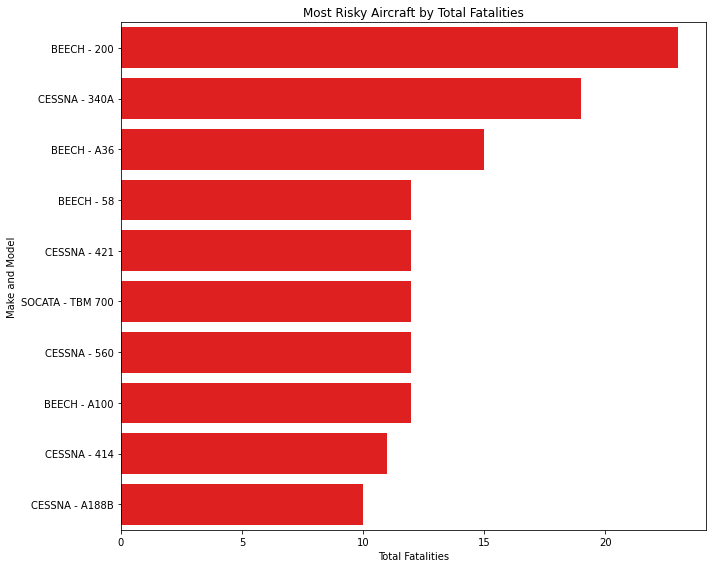

In [45]:
# Groupby 'Make' and 'Model', and sum 'Total.Uninjured'
uninjured_by_make_model = df_clean.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)
# Creating a list of the Make and Model labels for the y-axis
make_model_labels = [f"{make} - {model}" for make, model in uninjured_by_make_model.index]
# Creating the horizontal bar plot using seaborn
plt.figure(figsize=(10, 8)) 
sns.barplot(x=uninjured_by_make_model.values, y=make_model_labels, orient='h', color='red')

plt.title('Most Risky Aircraft by Total Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

### The Most Safe Aircrafts Overall

To gain insight on the safest aircraft model and make, I group the `Model` and the `Make` variable and plot a barplot against `Total.Uninjured`

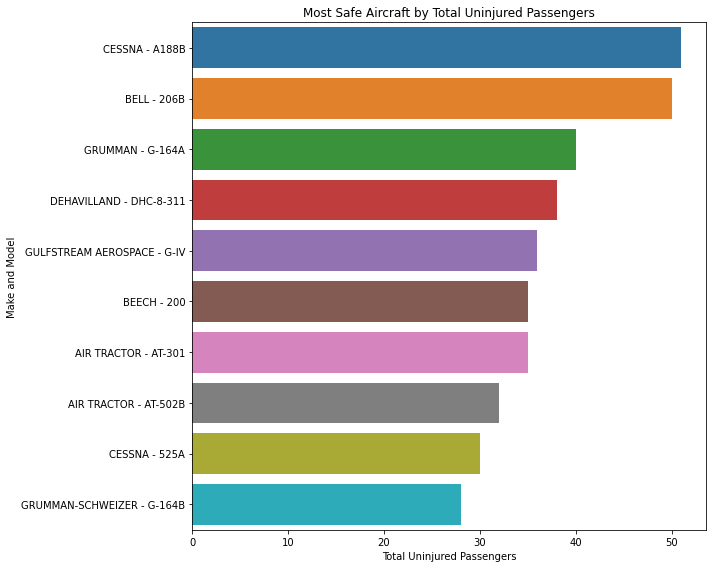

In [46]:
# Grouping by 'Make' and 'Model', and sum 'Total.Uninjured'
uninjured_by_make_model = df_clean.groupby(['Make', 'Model'])['Total.Uninjured'].sum().sort_values(ascending=False).head(10)

# Creating a list of the Make and Model labels for the y-axis
make_model_labels = [f"{make} - {model}" for make, model in uninjured_by_make_model.index]

# Creating the horizontal bar plot using seaborn
plt.figure(figsize=(10, 8)) 
sns.barplot(x=uninjured_by_make_model.values, y=make_model_labels, orient='h')
plt.title('Most Safe Aircraft by Total Uninjured Passengers')
plt.xlabel('Total Uninjured Passengers')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

To determine the safest aircraft models for each of the three civil aviation services the company can venture into; the three categorical values for the `Purpose.of.Flight` columns are plotted in a barplot against uninjured passengers `Total.Uninjured`.

### Recommended Aircrafts for Targeted Aviation Services' Niche

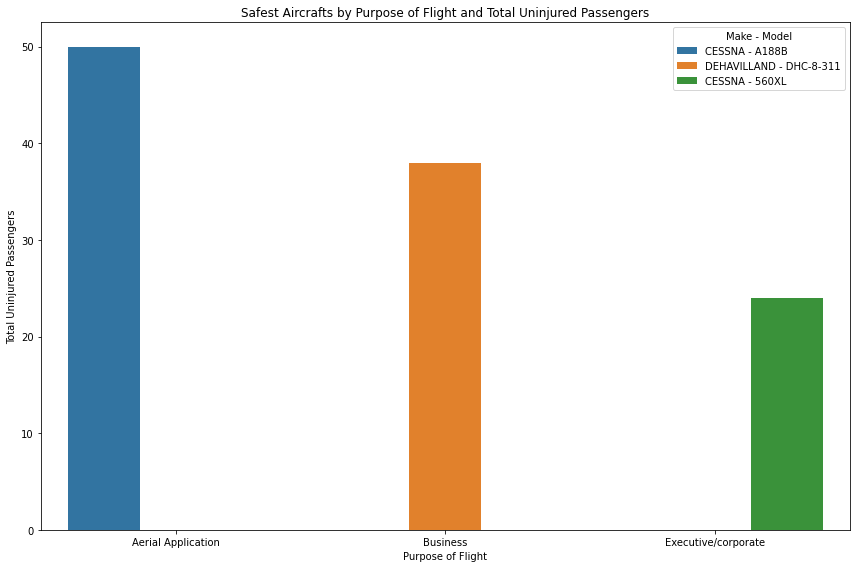

In [47]:
# Filtering for the relevant Purpose.of.flight values
df_filtered = df_clean[df_clean['Purpose.of.flight'].isin(['Aerial Application', 'Business', 'Executive/corporate'])]

# Group by 'Purpose.of.flight', 'Make', and 'Model', and sum 'Total.Uninjured'
uninjured_by_purpose_make_model = df_filtered.groupby(['Purpose.of.flight', 'Make', 'Model'], observed=True)['Total.Uninjured'].sum().reset_index()

# Finding the safest aircraft (highest 'Total.Uninjured') for each purpose
safest_aircraft = uninjured_by_purpose_make_model.loc[uninjured_by_purpose_make_model.groupby('Purpose.of.flight', observed=True)['Total.Uninjured'].idxmax()]

# Creating the "Make - Model" column
safest_aircraft['Make - Model'] = safest_aircraft['Make'] + ' - ' + safest_aircraft['Model']

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Purpose.of.flight', y='Total.Uninjured', hue='Make - Model', data=safest_aircraft)
plt.title('Safest Aircrafts by Purpose of Flight and Total Uninjured Passengers')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Uninjured Passengers')
plt.legend(title='Make - Model')
plt.tight_layout()
plt.show()

## Evaluation
The baseline model shed the following insights:
* The BEECH-200 (8-seater), the CESSNA-340A (6-seater), and the BEECH-A36 (6-seater), are the top-three most risky aircraft overall.
* The CESSNA-A188B (1-seater), the BELL-206B (5-seater), and the GRUMMAN-G-164A (1-seater) are the top-three safest aircraft models overall.

<strong>Recommendations:</strong>

* The CESSNA-560XL (10-seater) is the safest aircraft for Executive/corporate flights.
* The DEHAVILLAND-DHC-8-311 (50-seater) is the safest airplane for business flights.
* The CESSNA-A188B (1-seater) is the safest aircraft for Aerial Applications.

The number of engines for these aircraft models. 
* BEECH-200: 2 engines   
* CESSNA-340A:2 engines
* BEECH-A36:1 engine
* BELL-206B: 1 engine
* GRUMMAN-G-164A: 1 engine
* CESSNA-560XL: 2 engines   
* CESSNA-A188B: 1 engine   
* DEHAVILLAND-DHC-8-311: 2 engines   

Multi-engine aircraft are typically safer in comparison to single-engine airplanes (Pilot Institute, 2023). More than one engine avails redundancy to propulsion units. Pilots can recalibrate controls and continue flying if one engine stalls or malfunctions. In contrast, such an incident in a single-engine aircraft poses a substantial risk of crashing if the gliding distance falls short of a runway or a relatively flat surface for an emergency landing. Thus, I modified the baseline model to drop row entries whose `Number.of.Engines` is less than 2.

In [48]:
# Creating a copy of the df_clean dataframe to avoid modifying the baseline model
df_modified = df_clean.copy()
df_modified.shape
print(f"This data set consists of {df_modified.shape[0]} rows")
print(f"This data set consists of {df_modified.shape[1]} columns")

This data set consists of 2534 rows
This data set consists of 15 columns


In [49]:
# Applying a lambda function to drop entries for single-engine aircraft
df_modified = df_modified[df_modified['Number.of.Engines'].apply(lambda x: x >= 2)]

In [50]:
# Confirming if the modifications are imputed to the df_modified dataframe
df_modified['Number.of.Engines'].value_counts()

2.0    369
3.0      7
4.0      3
Name: Number.of.Engines, dtype: int64

In [51]:
df_modified.shape
print(f"This data set consists of {df_modified.shape[0]} rows")
print(f"This data set consists of {df_modified.shape[1]} columns")

This data set consists of 379 rows
This data set consists of 15 columns


Replotting bar plots to determine the most risky, the safest, and the appropriate airplanes (that have more than one engine) for the company's operations

### The Least Safe Multi-Engine Aircrafts

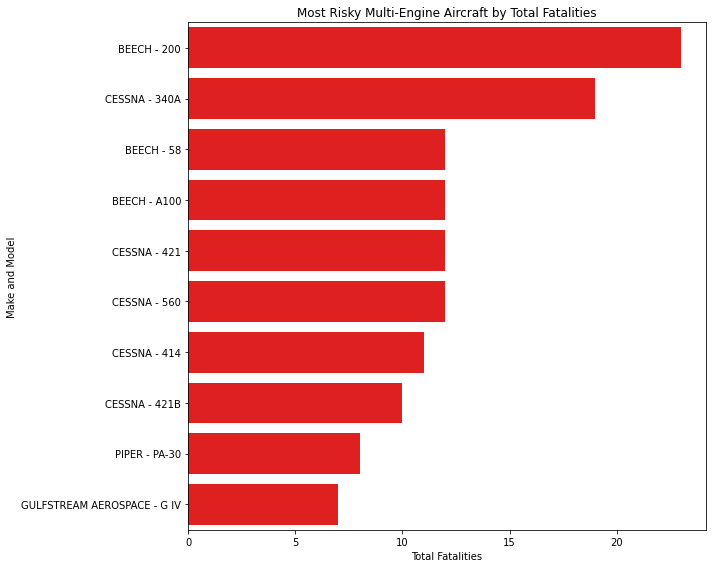

In [52]:
# Grouping by 'Make' and 'Model', and sum 'Total.Uninjured'
uninjured_by_make_model = df_modified.groupby(['Make', 'Model'])['Total.Fatal.Injuries'].sum().sort_values(ascending=False).head(10)

# Creating a list of the Make and Model labels for the y-axis
make_model_labels = [f"{make} - {model}" for make, model in uninjured_by_make_model.index]

# Creating the horizontal bar plot using seaborn
plt.figure(figsize=(10, 8)) 
sns.barplot(x=uninjured_by_make_model.values, y=make_model_labels, orient='h', color='red')
plt.title('Most Risky Multi-Engine Aircraft by Total Fatalities')
plt.xlabel('Total Fatalities')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

### The Most Safe Multi-Engine Aircrafts

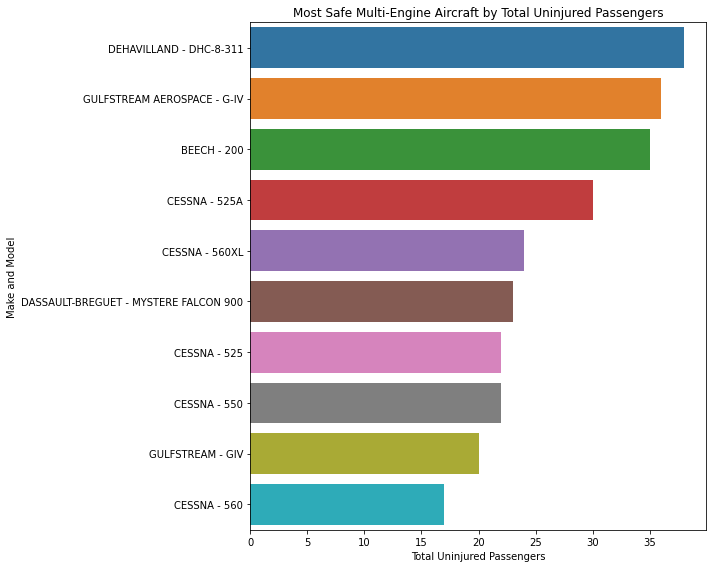

In [53]:
# Grouping by 'Make' and 'Model', and sum 'Total.Uninjured'
uninjured_by_make_model = df_modified.groupby(['Make', 'Model'])['Total.Uninjured'].sum().sort_values(ascending=False).head(10)

# Creating a list of the Make and Model labels for the y-axis
make_model_labels = [f"{make} - {model}" for make, model in uninjured_by_make_model.index]

# Creating the horizontal bar plot using seaborn
plt.figure(figsize=(10, 8)) 
sns.barplot(x=uninjured_by_make_model.values, y=make_model_labels, orient='h')
plt.title('Most Safe Multi-Engine Aircraft by Total Uninjured Passengers')
plt.xlabel('Total Uninjured Passengers')
plt.ylabel('Make and Model')
plt.tight_layout()
plt.show()

### Recommended Multi-Engine Aircrafts for Targeted Aviation Services' Niche

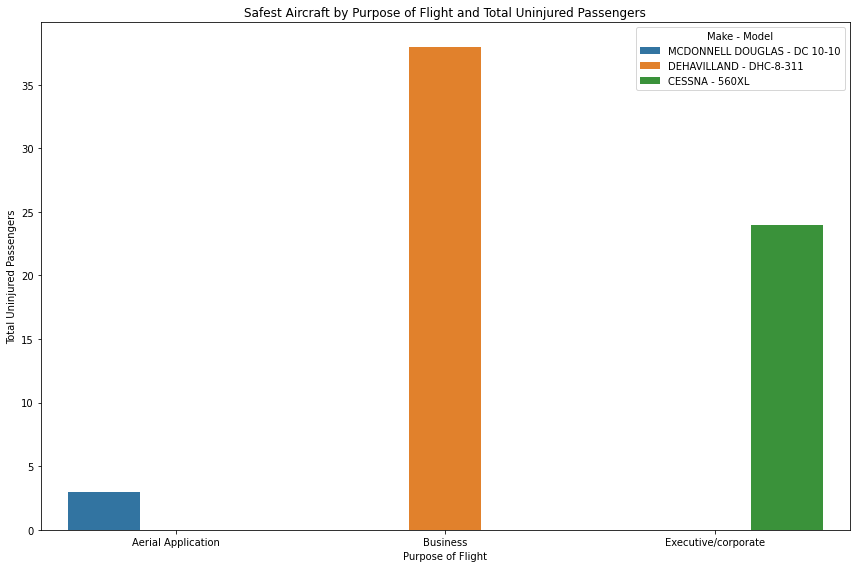

In [54]:
# Filtering for the relevant Purpose.of.flight values
df_filtered = df_modified[df_modified['Purpose.of.flight'].isin(['Aerial Application', 'Business', 'Executive/corporate'])]

# Grouping by 'Purpose.of.flight', 'Make', and 'Model', and sum 'Total.Uninjured'
uninjured_by_purpose_make_model = df_filtered.groupby(['Purpose.of.flight', 'Make', 'Model'], observed=True)['Total.Uninjured'].sum().reset_index()

# Finding the safest aircraft (highest 'Total.Uninjured') for each purpose
safest_aircraft = uninjured_by_purpose_make_model.loc[uninjured_by_purpose_make_model.groupby('Purpose.of.flight', observed=True)['Total.Uninjured'].idxmax()]

# Creating the "Make - Model" column
safest_aircraft['Make - Model'] = safest_aircraft['Make'] + ' - ' + safest_aircraft['Model']

# Creating the bar plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Purpose.of.flight', y='Total.Uninjured', hue='Make - Model', data=safest_aircraft)
plt.title('Safest Aircraft by Purpose of Flight and Total Uninjured Passengers')
plt.xlabel('Purpose of Flight')
plt.ylabel('Total Uninjured Passengers')
plt.legend(title='Make - Model')
plt.tight_layout()
plt.show()

The modified model sheds the following insight:
* The BEECH-200 (13-seater), the CESSNA-340A (6-seater), and the BEECH-A400 (8-seater) are the top-three most risky multi-engine aircraft to operate.
* The DEHAVILLAND DHC-8-311 (50-seater), the GULFSTREAM AEROSPACE-G-IV (10-seater), and the BEECH-200 (13-seater) are the top-three safest multi-engine aircraft to operate.


<strong>Recommendations:</strong>

* The CESSNA 560XL(10-seater) is the safest multi-engine aircraft for Executive/corporate flights.
* The DEHAVILLAND -DHC-8-311(50-seater) is the safest multi-engine aircraft for business flights.
* The MCDONNELL DOUGLAS-DC 10-10(250-seater) is the safest multi-engine aircraft for Aerial Applications.

The number of engines for these aircraft models. 
* BEECH-200: 2 engines   
* CESSNA-340A: 2 engines   
* BEECH-A400: 2 engines
* GULFSTREAM AEROSPACE-G-IV: 2 engines
* CESSNA 560XL: 2 engines   
* DEHAVILLAND DHC-8-311: 2 engines
* MCDONNELL DOUGLAS -DC 10-10: 3 engines

The findings from the results yielded by the baseline model are compared to those yielded by the modified model. After entering the industry, the recommended safest aircraft model for the aviation services the company will offer is based on respective applicability and operational logistics. 

## Conclusions
The analysis yields three recommendations on the aircraft models the company should procure and operate after entering the commercial aviation industry.
* <strong>The CESSNA-560XL aircraft is recommended for Executive/ Corporate flights:</strong> The baseline and modified model conform the aircraft is safest for executive and corporate flights.   
* <strong>The DEHAVILLAND DHC-8-311 aircraft is recommended for Business Flights:</strong> The baseline and modified model conform the aircraft is safest for business flights. 
* <strong>The CESSNA-A188B aircraft is recommended for Aerial Applications:</strong> The modified model proposes the MCDONNELL DOUGLAS-DC 10-10 (a three-engine, 250-seater) aircraft for aerial applications. The proposed alternative by the modified model is rejected because aerial applications typically include agricultural activities such as spraying crop fields. Hence, the single-engine CESSNA-A188B is recommended for aerial applications.

## References
Altundag, A., & Wynn, M. (2024). Advanced Analytics and Data Management in the Procurement Function: An Aviation Industry Case Study. Electronics, 13(8), 1554.https://doi.org/10.3390/electronics13081554

Boyd, D. D., & Stolzer, A. (2016). Accident-precipitating factors for crashes in turbine-powered general aviation aircraft. Accident Analysis & Prevention, 86, 209-216.https://doi.org/10.1016/j.aap.2015.10.024

NTSB. (2023). Aviation Accident Database & Synopses, up to 2023. https://doi.org/10.34740/KAGGLE/DSV/4875576

Luo, J. (2022). Data-driven innovation: What is it?. IEEE Transactions on Engineering Management, 70(2), 784-790. https://doi.org/10.1109/TEM.2022.3145231

Pilot Institute. (2023). Single Engine Vs. Multi Engine: Which is Better? https://pilotinstitute.com/single-vs-multi-engine/
